In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# ----------------------IMPORTATION DES DONNEES------------------------------
def importation(path):
    return pd.read_csv(path, encoding='ISO-8859-1')

In [4]:
# customers
print("TABLE CUSTOMERS")
cst_path = "./datasets/Customers.csv"
customer = importation(cst_path)

customer.head()

# exchange
print("TABLE EXCHANGE")
exc_path= "./datasets/Exchange_Rates.csv"
exchange = importation(exc_path)
exchange.head()


# product
print("TABLE PRODUCT")
prod_path= "./datasets/Products.csv"
product = importation(prod_path)
product.head()


# sales
print("TABLE SALES")
sls_path= "./datasets/Sales.csv"
sales = importation(sls_path)
sales.head()


# store
print("TABLE STORE")
str_path= "./datasets/Stores.csv"
store = importation(str_path)
store.head()


TABLE CUSTOMERS
TABLE EXCHANGE
TABLE PRODUCT
TABLE SALES
TABLE STORE


,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015


In [5]:
# ----------------------RENOMMER LES COLONNES------------------------------


customer
customer= customer.rename(columns={"CustomerKey": "customer_id","Gender": "gender", "Name": "name", "City":"cst_city","State Code": "cst_state_code","State" : "cst_state","Zip Code":"cst_zip_code","Country" : "cst_country","Continent": "cst_continent","Birthday":"cst_birthday"})
customer.info()

# exchange
exchange = exchange.rename(columns={"Date": "exchange_date", "Currency":"currency_code", "Exchange":"exchange"})
exchange.info()


# product
product = product.rename(columns={"ProductKey": "product_id","Product Name": "product_name",
"Brand": "brand", "Color": "color", "Unit Cost USD": "unit_cost_USD","Unit Price USD": "unit_price_USD", 
"SubcategoryKey": "subcategory_id","Subcategory": "subcategory", "CategoryKey": "category_id", "Category":"category"})

product.info()

# sales
sales = sales.rename(columns={"Order Number" : "order_number","Line Item" : "line_item", "Order Date":"order_date",
"Delivery Date":"delivery_date", "CustomerKey": "customer_id" , "StoreKey":"store_id" ,"ProductKey": "product_id",
"Quantity":"quantity", "Currency Code":"currency_code"})
sales.info()

# store
store = store.rename(columns={"StoreKey":"store_id","State":"store_state", "Square Meters":"square_meters", "Open Date":"open_date", "Country":"st_country"})
store.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     15266 non-null  int64 
 1   gender          15266 non-null  object
 2   name            15266 non-null  object
 3   cst_city        15266 non-null  object
 4   cst_state_code  15256 non-null  object
 5   cst_state       15266 non-null  object
 6   cst_zip_code    15266 non-null  object
 7   cst_country     15266 non-null  object
 8   cst_continent   15266 non-null  object
 9   cst_birthday    15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   exchange_date  11215 non-null  object 
 1   currency_code  11215 non-null  object 
 2   exchange       11215 non

In [6]:
# ----------------------INFORMATION SUR LES TYPES DE DONNEES------------------------------

customer.info()
exchange.info()
product.info()
sales.info()
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     15266 non-null  int64 
 1   gender          15266 non-null  object
 2   name            15266 non-null  object
 3   cst_city        15266 non-null  object
 4   cst_state_code  15256 non-null  object
 5   cst_state       15266 non-null  object
 6   cst_zip_code    15266 non-null  object
 7   cst_country     15266 non-null  object
 8   cst_continent   15266 non-null  object
 9   cst_birthday    15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [7]:
# ----------------------MODIFICATION DES TYPES DE DONNEES NECESSAIRES------------------------------


# customer
customer['customer_id'] = customer['customer_id'].astype(str)

customer['cst_birthday'] = pd.to_datetime(customer['cst_birthday'], format='%m/%d/%Y')

customer.info()
customer.head()


# exchange
exchange['exchange_date']  = pd.to_datetime(exchange['exchange_date'] )
exchange['exchange_date']  = exchange['exchange_date'] .dt.strftime('%m/%d/%Y')

exchange['exchange'] = exchange['exchange'].astype(str).str.replace('.', ',')
exchange['exchange'] = exchange['exchange'].str.replace(',', '.').astype(float)

exchange.info()
exchange.head()


# product

product['product_id'] = product['product_id'].astype(str)

product['unit_cost_USD'] = product['unit_cost_USD'].astype(str).str.replace('$', '')
product['unit_cost_USD'] = product['unit_cost_USD'].astype(str).str.replace(',', '')
product['unit_cost_USD'] = product['unit_cost_USD'].astype(str).str.replace('.', ',')
product['unit_cost_USD'] = product['unit_cost_USD'].str.replace(',', '.').astype(float)

product['unit_price_USD'] = product['unit_price_USD'].astype(str).str.replace('$', '')
product['unit_price_USD'] = product['unit_price_USD'].astype(str).str.replace(',', '')
product['unit_price_USD'] = product['unit_price_USD'].astype(str).str.replace('.', ',')
product['unit_price_USD'] = product['unit_price_USD'].str.replace(',', '.').astype(float)

# enlever le nom des marques sur le nom du produit
product['product_name'] = product['product_name'].astype(str).str.replace('Contoso', '')
product['product_name'] = product['product_name'].astype(str).str.replace('WWI', '')
product['product_name'] = product['product_name'].astype(str).str.replace('NT', '')
product['product_name'] = product['product_name'].astype(str).str.replace('Adventure Works', '')
product['product_name'] = product['product_name'].astype(str).str.replace('SV', '')
product['product_name'] = product['product_name'].astype(str).str.replace('A. Datum', '')
product['product_name'] = product['product_name'].astype(str).str.replace('Fabrikam', '')
product['product_name'] = product['product_name'].astype(str).str.replace('Litware ', '')
product['product_name'] = product['product_name'].astype(str).str.replace('Proseware', '')
product['product_name'] = product['product_name'].astype(str).str.replace('MGS ', '')
product['product_name'] = product['product_name'].astype(str).str.replace('The Phone Company', '')

# enlever les couleurs dans le nom du produit
product['product_name'] = product['product_name'].astype(str).str.replace('Azure', '')
product['product_name'] = product['product_name'].astype(str).str.replace('Black', '')
product['product_name'] = product['product_name'].astype(str).str.replace('Blue', '')
product['product_name'] = product['product_name'].astype(str).str.replace('Brown', '')
product['product_name'] = product['product_name'].astype(str).str.replace('Grey', '')
product['product_name'] = product['product_name'].astype(str).str.replace('Gold', '')
product['product_name'] = product['product_name'].astype(str).str.replace('Green', '')
product['product_name'] = product['product_name'].astype(str).str.replace('Orange', '')
product['product_name'] = product['product_name'].astype(str).str.replace('Pink', '')
product['product_name'] = product['product_name'].astype(str).str.replace('Purple', '')
product['product_name'] = product['product_name'].astype(str).str.replace('Red', '')
product['product_name'] = product['product_name'].astype(str).str.replace('Silver', '')
product['product_name'] = product['product_name'].astype(str).str.replace('Silver Grey', '')
product['product_name'] = product['product_name'].astype(str).str.replace('Transparent', '')
product['product_name'] = product['product_name'].astype(str).str.replace('White', '')
product['product_name'] = product['product_name'].astype(str).str.replace('Yellow', '')

product['subcategory_id'] = product['subcategory_id'].astype(str)

product['category_id'] = product['category_id'].astype(str)

product.info()
product.head()


# sales

sales['order_number'] = sales['order_number'].astype(str)

sales['order_date'] = pd.to_datetime(sales['order_date'])

sales['delivery_date'] = pd.to_datetime(sales['delivery_date'])

sales['customer_id'] = sales['customer_id'].astype(str)

sales['store_id'] = sales['store_id'].astype(str)

sales['product_id'] = sales['product_id'].astype(str)

sales.info()
sales.head()


# store
store['store_id'] = store['store_id'].astype(str)

store['square_meters'] = store['square_meters'].astype(str).str.replace('.', ',')
store['square_meters'] = store['square_meters'].str.replace(',', '.').astype(float)

store['open_date'] = pd.to_datetime(store['open_date'])

store.info()
store.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     15266 non-null  object        
 1   gender          15266 non-null  object        
 2   name            15266 non-null  object        
 3   cst_city        15266 non-null  object        
 4   cst_state_code  15256 non-null  object        
 5   cst_state       15266 non-null  object        
 6   cst_zip_code    15266 non-null  object        
 7   cst_country     15266 non-null  object        
 8   cst_continent   15266 non-null  object        
 9   cst_birthday    15266 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(9)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   exchang

,store_id,st_country,store_state,square_meters,open_date
0,1,Australia,Australian Capital Territory,595.0,2008-01-01
1,2,Australia,Northern Territory,665.0,2008-01-12
2,3,Australia,South Australia,2000.0,2012-01-07
3,4,Australia,Tasmania,2000.0,2010-01-01
4,5,Australia,Victoria,2000.0,2015-12-09


In [8]:
# ----------------------JOINTURE DES DATASETS------------------------------


df_1 = pd.merge(sales, customer, how= "inner", on='customer_id')

df_2 = pd.merge(df_1, store,how= "inner", on='store_id')

df = pd.merge(df_2, product,how= "inner", on='product_id')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_number    62884 non-null  object        
 1   line_item       62884 non-null  int64         
 2   order_date      62884 non-null  datetime64[ns]
 3   delivery_date   13165 non-null  datetime64[ns]
 4   customer_id     62884 non-null  object        
 5   store_id        62884 non-null  object        
 6   product_id      62884 non-null  object        
 7   quantity        62884 non-null  int64         
 8   currency_code   62884 non-null  object        
 9   gender          62884 non-null  object        
 10  name            62884 non-null  object        
 11  cst_city        62884 non-null  object        
 12  cst_state_code  62854 non-null  object        
 13  cst_state       62884 non-null  object        
 14  cst_zip_code    62884 non-null  object        
 15  cs

,order_number,line_item,order_date,delivery_date,customer_id,store_id,product_id,quantity,currency_code,gender,...,open_date,product_name,brand,color,unit_cost_USD,unit_price_USD,subcategory_id,subcategory,category_id,category
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,Male,...,2015-04-04,Lens Adapter M450,Contoso,White,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Male,...,2010-01-01,SLR Camera X136,A. Datum,Silver,141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Male,...,2010-01-01,Microwave 1.5CuFt X1100,Fabrikam,Black,220.64,665.94,803,Microwaves,8,Home Appliances
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Female,...,2010-01-01,SLR Camera M146,Contoso,Orange,148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Female,...,2010-01-01,Laptop8.9 E0890,Adventure Works,White,166.20,326.00,301,Laptops,3,Computers


In [9]:
# GRAPHIQUE 1: VENTES TOTALES (CHIFFRE D'AFFAIRES)

# Calcul des ventes totales pour chaque transaction
df['total_sales'] = df['quantity'] * df['unit_price_USD']

# Calcul du chiffre d'affaires total
total_revenue = df['total_sales'].sum()

print(f"Le chiffre d'affaires total de l'entreprise est : {total_revenue:.2f} USD")


Le chiffre d'affaires total de l'entreprise est : 55755479.59 USD


In [10]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.


In [11]:
# GRAPHIQUE 2: TOP 5 BEST-SELLING PRODUCT EN FONCTION DU CHIFFRE D'AFFAIRES

from tabulate import tabulate
product_sales = df.groupby('product_name')['total_sales'].sum().reset_index()

# Trier les produits par chiffre d'affaires total en ordre décroissant
top_products = product_sales.sort_values(by='total_sales', ascending=False).head(5)
top_products.columns = ['Produit', 'Total des ventes']

# Affichage des résultats sous forme de tableau
print("TOP 5 BEST-SELLING PRODUCT")
print(tabulate(top_products, headers='keys', tablefmt='pretty', stralign='center'))

TOP 5 BEST-SELLING PRODUCT
+-----+---------------------------+--------------------+
|     |          Produit          |  Total des ventes  |
+-----+---------------------------+--------------------+
| 199 |   Desktop PC2.33 XD233    |     1814937.0      |
| 198 |   Desktop PC2.33 X2330    |     1713016.0      |
| 51  |     52" LCD HDTV X590     | 1432595.0599999998 |
| 618 | Water Heater 7.2GPM X1800 |     1221300.0      |
| 197 |   Desktop PC2.30 MD230    |     1150444.5      |
+-----+---------------------------+--------------------+


C:\Users\auden\AppData\Local\Temp\ipykernel_7948\4170937435.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_distribution, x='age_group', y='total_sales', palette='viridis')
c:\Users\auden\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 7 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


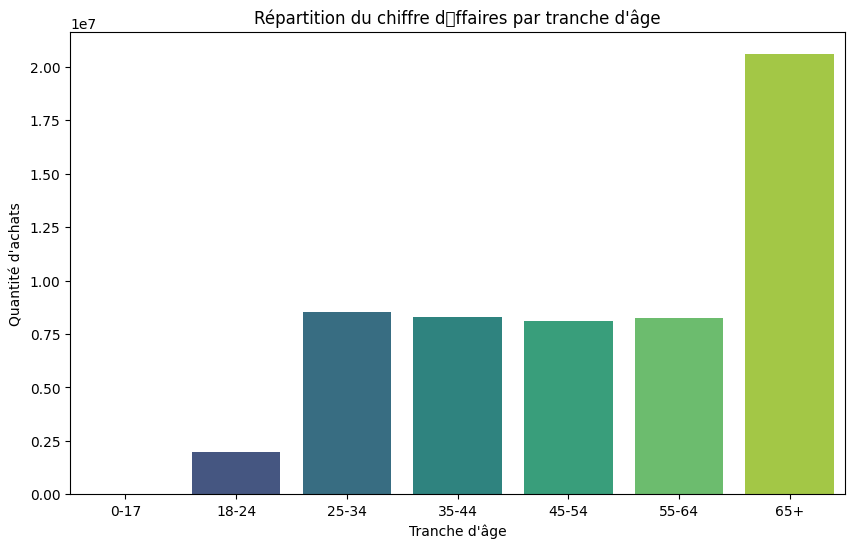

In [12]:
 # GRAPHIQUE 3:histogramme de repartition des achats par tranche d'age

# Calculer l'âge en années
today = pd.to_datetime('today')
df['age'] = today.year - df['cst_birthday'].dt.year 
# Définir les tranches d'âge
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Agréger les quantités d'achats par tranche d'âge
age_distribution = df.groupby('age_group', observed=False)['total_sales'].sum().reset_index()
# Ajouter une colonne `hue` fictive pour éviter l'avertissement

# Tracer l'histogramme
plt.figure(figsize=(10, 6))
sns.barplot(data=age_distribution, x='age_group', y='total_sales', palette='viridis')
plt.title('Répartition du chiffre d\affaires par tranche d\'âge')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Quantité d\'achats')
plt.show()

In [14]:
# GRAPHIQUE 4:
import plotly.express as px

# Assurez-vous que les dates sont bien formatées
df['delivery_date'] = pd.to_datetime(df['delivery_date'], errors='coerce')

# Extraire l'année
df['delivery_year'] = df['delivery_date'].dt.year

# Agréger les ventes totales par marque et par année
annual_brand_sales = df.groupby(['delivery_year', 'brand'])['total_sales'].sum().reset_index()

# Créer le graphique à barres empilées horizontal avec plotly
fig = px.bar(
    annual_brand_sales,
    x='total_sales',
    y='delivery_year',
    color='brand',
    orientation='h',
    title='Part de chaque marque dans le chiffre d\'affaires par année',
    labels={'total_sales': 'Chiffre d\'affaires (USD)', 'delivery_year': 'Année'},
    color_discrete_sequence=px.colors.sequential.Viridis,
    height=600
)

# Personnaliser la légende en haut
fig.update_layout(
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1,
        xanchor='right',
        x=1
    ),
    xaxis_title='Chiffre d\'affaires (USD)',
    yaxis_title='Année',
    barmode='stack',
    title={
        'text': "Part de chaque marque dans le chiffre d'affaire par année",
        'x': 0.5, # Position horizontale du titre (0= gauche, 0.5=centre, 1=droite)
        'y': 0.95, # Position verticale du titre
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=20, color='black', family='Arial')
    },
)

# Afficher le graphique
fig.show()


In [24]:
# GRAPHIQUE 5: TEMPS DE LIVRAISON MOYENNE

sales['delivery_delay'] = sales['delivery_date'].fillna(pd.to_datetime('NaT')) - sales['order_date']
sales['delivery_delay'] = sales['delivery_delay'].dt.days.fillna(-1)  # Remplacer NaT par -1

mean_delivery_delay = sales[sales['delivery_delay'] > -1]['delivery_delay'].mean() 
sales['delivery_date'] = sales.apply(lambda row: row['order_date'] + pd.Timedelta(days=mean_delivery_delay) if row['delivery_delay'] == -1 else row['delivery_date'],
    axis=1)

print(f"Le temps de livraison moyen est de {mean_delivery_delay:.2f} jours.")
 # Pour remplacer les dates de livraison manquantes par la date de commande plus le retard moyen (en excluant les non-livraisons)

Le temps de livraison moyen est de 4.11 jours.


In [15]:
pip install statsmodels.tsa.api

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement statsmodels.tsa.api (from versions: none)
ERROR: No matching distribution found for statsmodels.tsa.api


In [ ]:
df['order_year'] = df['order_date'].dt.year
annual_sales = df.groupby('order_year')['total_sales'].sum().reset_index()

from statsmodels.tsa.api import ExponentialSmoothing

# Définir l'index sur les années
annual_sales.set_index('order_year', inplace=True)

# Créer et ajuster le modèle
model = ExponentialSmoothing(annual_sales['total_sales'], trend='add', seasonal=None)
model_fit = model.fit()

# Prévisions
forecast_periods = 5
forecast = model_fit.get_forecast(steps=forecast_periods)
forecast_index = range(annual_sales.index.max() + 1, annual_sales.index.max() + 1 + forecast_periods)
forecast_df = pd.DataFrame({
    'forecast': forecast.predicted_mean,
    'lower_ci': forecast.conf_int(alpha=0.05)['lower total_sales'],
    'upper_ci': forecast.conf_int(alpha=0.05)['upper total_sales']
}, index=forecast_index)


NameError: name 'df' is not defined